<a href="https://colab.research.google.com/github/kim-star/DataScience/blob/master/210817_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B8%EC%BD%94%EB%94%A9_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_%EB%B0%B0%ED%8F%AC%EC%9A%A9_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 실습

## 데이터 인코딩

### 데이터 로딩
실습 데이터 소개 : Seaborn 에 내장된 tips 데이터셋

In [1]:
# 필요한 라이브러리 로딩
import seaborn as sns

#데이터 로딩
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# day 의 카테고리 값 확인
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [4]:
# 인코딩할 컬럼 데이터 준비 
items = tips['day']

### 라벨 인코딩

In [5]:
# LabelEncoder 로딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# fit 메소드에 인코딩할 데이터 전달
encoder.fit(items)

# transform 메소드를 통해 데이터 변환 
labels = encoder.transform(items)

In [6]:
# 인코딩 결과 출력
print('Label Encoding Result:\n',labels)

Label Encoding Result:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]


In [8]:
# 인코딩된 수치형 데이터의 실제 클래스 확인 및 출력
classes = encoder.classes_
print('LabelEncoding classes:', classes)

LabelEncoding classes: ['Fri' 'Sat' 'Sun' 'Thur']


In [10]:
# 디코딩 결과 확인 및 출력
inverse_result = encoder.inverse_transform([1])
print('LabelDecoding result:', inverse_result)

LabelDecoding result: ['Sat']


### 원핫 인코딩

In [11]:
# OneHotEncoder로딩
from sklearn.preprocessing import OneHotEncoder

In [14]:
# 2차원 으로 변경(244,)
labels = labels.reshape(-1,1)
labels.shape

(244, 1)

In [19]:
# OneHotEncoder 객체 생성
one_hot_encoder = OneHotEncoder()

# .fit 메소드에 인코딩할 데이터 전달
one_hot_encoder.fit(labels)

# .transform 메소드를 통해 데이터 변환 
one_hot_labels = one_hot_encoder.transform(labels)
#one_hot_labels #shape (244,4) fri, sa, sun, thur로 4

<244x4 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>

In [18]:
# 인코딩 결과 출력
print('OneHotEncoding Result:\n',  one_hot_labels)

OneHotEncoding Result:
   (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (219, 1)	1.0
  (220, 0)	1.0
  (221, 0)	1.0
  (222, 0)	1.0
  (223, 0)	1.0
  (224, 0)	1.0
  (225, 0)	1.0
  (226, 0)	1.0
  (227, 1)	1.0
  (228, 1)	1.0
  (229, 1)	1.0
  (230, 1)	1.0
  (231, 1)	1.0
  (232, 1)	1.0
  (233, 1)	1.0
  (234, 1)	1.0
  (235, 1)	1.0
  (236, 1)	1.0
  (237, 1)	1.0
  (238, 1)	1.0
  (239, 1)	1.0
  (240, 1)	1.0
  (241, 1)	1.0
  (242, 1)	1.0
  (243, 3)	1.0


In [21]:
# 인코딩된 데이터의 실제 클래스 확인
onehot_classes = one_hot_labels.toarray()
print('OneHotEncoding classes:', onehot_classes)

OneHotEncoding classes: [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 

## 데이터 스케일링

### 데이터 로딩

In [24]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# StandardScaler 로딩
from sklearn.preprocessing import StandardScaler

# 데이터셋 파일명: bike_demand_kaggle.csv 
# 캐글의 자전거 대여 수요 데이터셋 다운로드
filepath = '/content/bike_demand_kaggle.csv'
df_bike = pd.read_csv(filepath)
df_bike.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
# temp, atemp, humidity, windspeed 컬럼 데이터만 저장
df_bike_num = df_bike.iloc[:, 5:9]
df_bike_num.head(5)

,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0
1,9.02,13.635,80,0.0
2,9.02,13.635,80,0.0
3,9.84,14.395,75,0.0
4,9.84,14.395,75,0.0


In [26]:
print('Average')
print(np.round_(df_bike_num.mean(),3))

Average
temp         20.231
atemp        23.655
humidity     61.886
windspeed    12.799
dtype: float64


In [27]:
print('Variance')
print(np.round_(df_bike_num.var(), 3))

Variance
temp          60.709
atemp         71.819
humidity     370.371
windspeed     66.660
dtype: float64


### StandardScaler 이용한 표준화 적용

In [31]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler 모델 통해 데이터 분포 분석
scaler.fit(df_bike_num)

# 모델 통해서 데이터 스케일링 후 반환
result = scaler.transform(df_bike_num)

result

array([[-1.33366069, -1.09273697,  0.99321305, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       ...,
       [-0.80742813, -0.91395927, -0.04606385,  0.26970368],
       [-0.80742813, -0.73518157, -0.04606385, -0.83244247],
       [-0.91267464, -0.82486544,  0.21375537, -0.46560752]])

In [33]:
# 스케일된 결과 데이터를 DataFrame 으로 저장
scaled_bike = pd.DataFrame(data=result,
                           columns = df_bike_num.columns)

In [35]:
# 각 컬럼별 평균, 분산 출력
print('--------- StandardScaler ---------')
print('Average')
print(np.round_(scaled_bike.mean(),3))
print('Variance')
print(np.round_(scaled_bike.var(),3))

--------- StandardScaler ---------
Average
temp         0.0
atemp       -0.0
humidity    -0.0
windspeed   -0.0
dtype: float64
Variance
temp         1.0
atemp        1.0
humidity     1.0
windspeed    1.0
dtype: float64


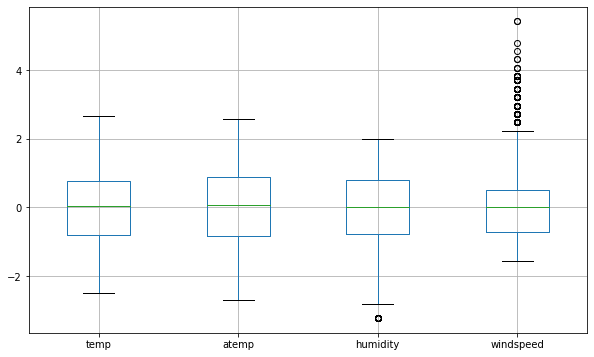

In [36]:
# 박스플롯(boxplot) 으로 시각화
plt.figure(figsize=(10,6))
scaled_bike.boxplot(column=['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()

### MinMaxScaler  이용한 정규화 적용

In [38]:
# temp, atemp, humidity, windspeed 컬럼 데이터만 저장
df_bike_num = df_bike.iloc[:, 5:9]
df_bike_num.head(5)

,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0
1,9.02,13.635,80,0.0
2,9.02,13.635,80,0.0
3,9.84,14.395,75,0.0
4,9.84,14.395,75,0.0


In [39]:
# 각 컬럼별 최대/최소값 출력
print('Min Value')
print(np.round_(df_bike_num.min(),3))
print('Max Value')
print(np.round_(df_bike_num.max(),3))

Min Value
temp         0.82
atemp        0.76
humidity     0.00
windspeed    0.00
dtype: float64
Max Value
temp          41.000
atemp         45.455
humidity     100.000
windspeed     56.997
dtype: float64


In [40]:
# MinMaxScaler 로딩
from sklearn.preprocessing import MinMaxScaler

In [42]:
# MinMaxScaler 객체 생성
MinMaxScaler() #()로 호출

# fit 함수 이용하여 데이터 분포 분석 및 스케일링 정보 저장
scaler.fit(df_bike_num)

# 실제 데이터 스케일링 작업 후 결과 데이터셋 반환
result = scaler.transform(df_bike_num)
result

array([[-1.33366069, -1.09273697,  0.99321305, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       [-1.43890721, -1.18242083,  0.94124921, -1.56775367],
       ...,
       [-0.80742813, -0.91395927, -0.04606385,  0.26970368],
       [-0.80742813, -0.73518157, -0.04606385, -0.83244247],
       [-0.91267464, -0.82486544,  0.21375537, -0.46560752]])

In [45]:
# 스케일된 결과 데이터를 DataFrame 으로 저장
pd.DataFrame(result,
             columns = df_bike_num.columns)

,temp,atemp,humidity,windspeed
0,-1.333661,-1.092737,0.993213,-1.567754
1,-1.438907,-1.182421,0.941249,-1.567754
2,-1.438907,-1.182421,0.941249,-1.567754
3,-1.333661,-1.092737,0.681430,-1.567754
4,-1.333661,-1.092737,0.681430,-1.567754
...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227
10882,-0.702182,-0.735182,-0.253919,0.269704
10883,-0.807428,-0.913959,-0.046064,0.269704
10884,-0.807428,-0.735182,-0.046064,-0.832442


In [49]:
# 각 컬럼별 최대/최소값 출력
print('--------- MinMaxScaler ---------')
print('Min Value')
print(np.round_(scaled_bike.min(),3))
print('Max Value')
print(np.round_(scaled_bike.max(),3)) 

--------- MinMaxScaler ---------
Min Value
temp        -2.491
atemp       -2.702
humidity    -3.216
windspeed   -1.568
dtype: float64
Max Value
temp         2.666
atemp        2.573
humidity     1.981
windspeed    5.414
dtype: float64


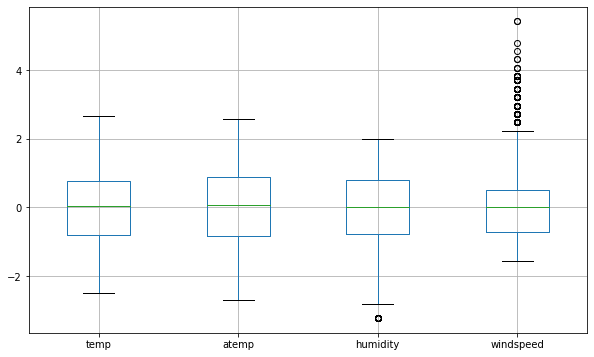

In [50]:
# 박스플롯(boxplot) 으로 시각화
plt.figure(figsize=(10,6))
scaled_bike.boxplot(column=['temp', 'atemp', 'humidity', 'windspeed'])
plt.show()